## Lab 2. Text Normalization (cleaning)

În funcție de task-ul pe care îl avem de realizat, putem alege una sau mai multe modalități de curățare a textului:
- Transformarea textului în litere mici
- Eliminarea cifrelor și numerelor (sau transformarea lor în cuvinte)
- Eliminarea link-urilor
- Eliminarea emoticoanelor ( :) :D) și a emoji-urilor (💙 🐱)
- Eliminarea punctuației
- Eliminarea stopwords
- Stemming/Lematizare
- Tokenizare

Vom folosi setul de date `twitter_samples` din `nltk` (https://www.nltk.org/), care conține tweeturi pozitive și negative. Vom folosi mai departe doar tweeturile pozitive.



In [1]:
! pip install nltk

You should consider upgrading via the '/home/stef/Documents/facultate_an3/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import nltk
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/stef/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
from nltk.corpus  import twitter_samples
tweets = twitter_samples.strings('positive_tweets.json')
tweets = tweets[500:520]
tweets

['Dang that is some rad @AbzuGame #fanart! :D https://t.co/bI8k8tb9ht',
 '@HardcoreGooners @tashagunners @kirstyburns3 @aprilburton21 @liztc2 @Miss_Boots1 @zannatur @NativeNoddy @NatG_22 @Ms_T_P CHEERS #TGIF :-)',
 'Massive congrats to Niamh Fennell here :)  Journalism Graduate Lands Dream Job Copying &amp; Pasting Tweets http://t.co/3db8Bj5trk',
 '@ice_crystal @Elbow @MeatBingo @govindajeggy Thank you! :)',
 'Stats for the day have arrived. 5 new followers and NO unfollowers :) via http://t.co/KfqcXZSVOT.',
 '@mrkennyt90 Yesss I am thank you :D',
 'I have Ariana grande Selena Gomez Louis tomlinson Rita  Liam Payne \nCaradelevingne 🌷I trade solo dm :)',
 '@DomSequitur tired. But fine :) you??',
 '@ohvdqohcdjroc Nope you can definitely still apply for this year if you want to :D #iamCA',
 '@ashleylynch @wetsprocket Ah, found it, thanks :)',
 '@BOYFI_MW aftie :p',
 'Goodmorning :)',
 '@AnneMOrbs  follow @jnlazts &amp; http://t.co/RCvcYYO0Iq follow u back :)',
 '@bjoernknafla @s_whiteant 

### Transformarea textului în litere mici

In [4]:
tweets_lower = [tweet.lower() for tweet in tweets]
tweets_lower

['dang that is some rad @abzugame #fanart! :d https://t.co/bi8k8tb9ht',
 '@hardcoregooners @tashagunners @kirstyburns3 @aprilburton21 @liztc2 @miss_boots1 @zannatur @nativenoddy @natg_22 @ms_t_p cheers #tgif :-)',
 'massive congrats to niamh fennell here :)  journalism graduate lands dream job copying &amp; pasting tweets http://t.co/3db8bj5trk',
 '@ice_crystal @elbow @meatbingo @govindajeggy thank you! :)',
 'stats for the day have arrived. 5 new followers and no unfollowers :) via http://t.co/kfqcxzsvot.',
 '@mrkennyt90 yesss i am thank you :d',
 'i have ariana grande selena gomez louis tomlinson rita  liam payne \ncaradelevingne 🌷i trade solo dm :)',
 '@domsequitur tired. but fine :) you??',
 '@ohvdqohcdjroc nope you can definitely still apply for this year if you want to :d #iamca',
 '@ashleylynch @wetsprocket ah, found it, thanks :)',
 '@boyfi_mw aftie :p',
 'goodmorning :)',
 '@annemorbs  follow @jnlazts &amp; http://t.co/rcvcyyo0iq follow u back :)',
 '@bjoernknafla @s_whiteant 

### Eliminarea cifrelor și numerelor (sau transformarea lor în cuvinte)

Eliminarea cifrelor folosind regex `re`

In [5]:
import re

tweets_no_digits = [re.sub(r'\d+', '', tweet) for tweet in tweets_lower]
tweets_no_digits

['dang that is some rad @abzugame #fanart! :d https://t.co/biktbht',
 '@hardcoregooners @tashagunners @kirstyburns @aprilburton @liztc @miss_boots @zannatur @nativenoddy @natg_ @ms_t_p cheers #tgif :-)',
 'massive congrats to niamh fennell here :)  journalism graduate lands dream job copying &amp; pasting tweets http://t.co/dbbjtrk',
 '@ice_crystal @elbow @meatbingo @govindajeggy thank you! :)',
 'stats for the day have arrived.  new followers and no unfollowers :) via http://t.co/kfqcxzsvot.',
 '@mrkennyt yesss i am thank you :d',
 'i have ariana grande selena gomez louis tomlinson rita  liam payne \ncaradelevingne 🌷i trade solo dm :)',
 '@domsequitur tired. but fine :) you??',
 '@ohvdqohcdjroc nope you can definitely still apply for this year if you want to :d #iamca',
 '@ashleylynch @wetsprocket ah, found it, thanks :)',
 '@boyfi_mw aftie :p',
 'goodmorning :)',
 '@annemorbs  follow @jnlazts &amp; http://t.co/rcvcyyoiq follow u back :)',
 '@bjoernknafla @s_whiteant that’s exactly th

Convertirea cifrelor în numere folosind `num2words`

In [6]:
! pip install num2words

You should consider upgrading via the '/home/stef/Documents/facultate_an3/venv/bin/python -m pip install --upgrade pip' command.


In [7]:
from num2words import num2words

tweets_num2words = []
for tweet in tweets_lower:
    tweets_num2words.append(' '.join([num2words(word) if word.isdigit() else word for word in tweet.split()]))

tweets_num2words

['dang that is some rad @abzugame #fanart! :d https://t.co/bi8k8tb9ht',
 '@hardcoregooners @tashagunners @kirstyburns3 @aprilburton21 @liztc2 @miss_boots1 @zannatur @nativenoddy @natg_22 @ms_t_p cheers #tgif :-)',
 'massive congrats to niamh fennell here :) journalism graduate lands dream job copying &amp; pasting tweets http://t.co/3db8bj5trk',
 '@ice_crystal @elbow @meatbingo @govindajeggy thank you! :)',
 'stats for the day have arrived. five new followers and no unfollowers :) via http://t.co/kfqcxzsvot.',
 '@mrkennyt90 yesss i am thank you :d',
 'i have ariana grande selena gomez louis tomlinson rita liam payne caradelevingne 🌷i trade solo dm :)',
 '@domsequitur tired. but fine :) you??',
 '@ohvdqohcdjroc nope you can definitely still apply for this year if you want to :d #iamca',
 '@ashleylynch @wetsprocket ah, found it, thanks :)',
 '@boyfi_mw aftie :p',
 'goodmorning :)',
 '@annemorbs follow @jnlazts &amp; http://t.co/rcvcyyo0iq follow u back :)',
 '@bjoernknafla @s_whiteant th

### Eliminarea link-urilor

In [8]:
tweets_no_links = [re.sub(r'http\S+', '', tweet) for tweet in tweets_no_digits]
tweets_no_links

['dang that is some rad @abzugame #fanart! :d ',
 '@hardcoregooners @tashagunners @kirstyburns @aprilburton @liztc @miss_boots @zannatur @nativenoddy @natg_ @ms_t_p cheers #tgif :-)',
 'massive congrats to niamh fennell here :)  journalism graduate lands dream job copying &amp; pasting tweets ',
 '@ice_crystal @elbow @meatbingo @govindajeggy thank you! :)',
 'stats for the day have arrived.  new followers and no unfollowers :) via ',
 '@mrkennyt yesss i am thank you :d',
 'i have ariana grande selena gomez louis tomlinson rita  liam payne \ncaradelevingne 🌷i trade solo dm :)',
 '@domsequitur tired. but fine :) you??',
 '@ohvdqohcdjroc nope you can definitely still apply for this year if you want to :d #iamca',
 '@ashleylynch @wetsprocket ah, found it, thanks :)',
 '@boyfi_mw aftie :p',
 'goodmorning :)',
 '@annemorbs  follow @jnlazts &amp;  follow u back :)',
 '@bjoernknafla @s_whiteant that’s exactly the look i’m going for :d',
 '#prokabaddi koel mallick @yourkoel recites the "nationa

### Eliminarea emoticoanelor ( :) :D) și a emoji-urilor (💙 🐱)

Eliminarea emoticoanelor folosind regexul din [ nltk Twitter Tokenizer](https://github.com/nltk/nltk/blob/develop/nltk/tokenize/casual.py)

In [9]:
emoticon_string = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
      |
      </?3                       # heart
    )"""
    
emoticon_re = re.compile(emoticon_string, re.VERBOSE | re.I | re.UNICODE)
tweets_no_emoticons = [re.sub(emoticon_re, '', tweet) for tweet in tweets_no_links]
tweets_no_emoticons

['dang that is some rad @abzugame #fanart!  ',
 '@hardcoregooners @tashagunners @kirstyburns @aprilburton @liztc @miss_boots @zannatur @nativenoddy @natg_ @ms_t_p cheers #tgif ',
 'massive congrats to niamh fennell here   journalism graduate lands dream job copying &am pasting tweets ',
 '@ice_crystal @elbow @meatbingo @govindajeggy thank you! ',
 'stats for the day have arrived.  new followers and no unfollowers  via ',
 '@mrkennyt yesss i am thank you ',
 'i have ariana grande selena gomez louis tomlinson rita  liam payne \ncaradelevingne 🌷i trade solo dm ',
 '@domsequitur tired. but fine  you??',
 '@ohvdqohcdjroc nope you can definitely still apply for this year if you want to  #iamca',
 '@ashleylynch @wetsprocket ah, found it, thanks ',
 '@boyfi_mw aftie ',
 'goodmorning ',
 '@annemorbs  follow @jnlazts &am  follow u back ',
 '@bjoernknafla @s_whiteant that’s exactly the look i’m going for ',
 '#prokabaddi koel mallick @yourkoel recites the "national anthem" for @starsportsindia on

Eliminarea emoji-urilor folosind `emoji` [library](https://github.com/carpedm20/emoji)

In [10]:
! pip install emoji

You should consider upgrading via the '/home/stef/Documents/facultate_an3/venv/bin/python -m pip install --upgrade pip' command.


`get_emoji_regexp()` returnează un regex care cuprinde toate emoji-urile.

In [11]:
import emoji

emoji_re = emoji.get_emoji_regexp()

tweets_no_emoji = [re.sub(emoji_re,'', tweet) for tweet in tweets_no_emoticons]
tweets_no_emoji

['dang that is some rad @abzugame #fanart!  ',
 '@hardcoregooners @tashagunners @kirstyburns @aprilburton @liztc @miss_boots @zannatur @nativenoddy @natg_ @ms_t_p cheers #tgif ',
 'massive congrats to niamh fennell here   journalism graduate lands dream job copying &am pasting tweets ',
 '@ice_crystal @elbow @meatbingo @govindajeggy thank you! ',
 'stats for the day have arrived.  new followers and no unfollowers  via ',
 '@mrkennyt yesss i am thank you ',
 'i have ariana grande selena gomez louis tomlinson rita  liam payne \ncaradelevingne i trade solo dm ',
 '@domsequitur tired. but fine  you??',
 '@ohvdqohcdjroc nope you can definitely still apply for this year if you want to  #iamca',
 '@ashleylynch @wetsprocket ah, found it, thanks ',
 '@boyfi_mw aftie ',
 'goodmorning ',
 '@annemorbs  follow @jnlazts &am  follow u back ',
 '@bjoernknafla @s_whiteant that’s exactly the look i’m going for ',
 '#prokabaddi koel mallick @yourkoel recites the "national anthem" for @starsportsindia on 

### Eliminarea hashtag-urilor și a mențiunilor

In [12]:
tweets_no_hashtags = [re.sub(r'#[a-zA-Z0-9_]+','', tweet) for tweet in tweets_no_emoji]
tweets_no_hashtags

['dang that is some rad @abzugame !  ',
 '@hardcoregooners @tashagunners @kirstyburns @aprilburton @liztc @miss_boots @zannatur @nativenoddy @natg_ @ms_t_p cheers  ',
 'massive congrats to niamh fennell here   journalism graduate lands dream job copying &am pasting tweets ',
 '@ice_crystal @elbow @meatbingo @govindajeggy thank you! ',
 'stats for the day have arrived.  new followers and no unfollowers  via ',
 '@mrkennyt yesss i am thank you ',
 'i have ariana grande selena gomez louis tomlinson rita  liam payne \ncaradelevingne i trade solo dm ',
 '@domsequitur tired. but fine  you??',
 '@ohvdqohcdjroc nope you can definitely still apply for this year if you want to  ',
 '@ashleylynch @wetsprocket ah, found it, thanks ',
 '@boyfi_mw aftie ',
 'goodmorning ',
 '@annemorbs  follow @jnlazts &am  follow u back ',
 '@bjoernknafla @s_whiteant that’s exactly the look i’m going for ',
 ' koel mallick @yourkoel recites the "national anthem" for @starsportsindia on day-!! ',
 ' and \nmonjuly  u

In [13]:
tweets_no_mentions = [re.sub(r'@[a-zA-Z0-9_]+','', tweet) for tweet in tweets_no_hashtags]
tweets_no_mentions

['dang that is some rad  !  ',
 '          cheers  ',
 'massive congrats to niamh fennell here   journalism graduate lands dream job copying &am pasting tweets ',
 '    thank you! ',
 'stats for the day have arrived.  new followers and no unfollowers  via ',
 ' yesss i am thank you ',
 'i have ariana grande selena gomez louis tomlinson rita  liam payne \ncaradelevingne i trade solo dm ',
 ' tired. but fine  you??',
 ' nope you can definitely still apply for this year if you want to  ',
 '  ah, found it, thanks ',
 ' aftie ',
 'goodmorning ',
 '  follow  &am  follow u back ',
 '  that’s exactly the look i’m going for ',
 ' koel mallick  recites the "national anthem" for  on day-!! ',
 ' and \nmonjuly  uk   \n\n&am  thurjuly itv\n',
 'for most of you it is  but for me it is ...\n for me and  for you!  ',
 'only one leg on september. so perhaps bb will promote the full album on september \n',
 'i still fully intend to write as many game designs as possible while there. and an attack plan 

Eliminăm spațiile multiple dintre cuvinte

In [14]:
tweets_no_spaces = [re.sub(r'\s+', ' ', tweet).strip() for tweet in tweets_no_mentions]
tweets_no_spaces

['dang that is some rad !',
 'cheers',
 'massive congrats to niamh fennell here journalism graduate lands dream job copying &am pasting tweets',
 'thank you!',
 'stats for the day have arrived. new followers and no unfollowers via',
 'yesss i am thank you',
 'i have ariana grande selena gomez louis tomlinson rita liam payne caradelevingne i trade solo dm',
 'tired. but fine you??',
 'nope you can definitely still apply for this year if you want to',
 'ah, found it, thanks',
 'aftie',
 'goodmorning',
 'follow &am follow u back',
 'that’s exactly the look i’m going for',
 'koel mallick recites the "national anthem" for on day-!!',
 'and monjuly uk &am thurjuly itv',
 'for most of you it is but for me it is ... for me and for you!',
 'only one leg on september. so perhaps bb will promote the full album on september',
 'i still fully intend to write as many game designs as possible while there. and an attack plan for the next months. &gtd',
 'to all the birds out there, come here and join 

### Tokenizare

- La nivel de propoziție: putem împărți un text în propoziții după punctuație, sau folosind [nltk.sent_tokenize](https://www.nltk.org/api/nltk.tokenize.html)

- La nivel de cuvânt: putem împărți după spațiu, sau să folosim [nltk.word_tokenize](https://www.nltk.org/api/nltk.tokenize.html)

Tokenizare la nivel de popoziție folosind regex



In [15]:
twitter_sent_tokenized = [re.split('(?<=[.!?])\s+', tweet) for tweet in tweets_no_spaces]
twitter_sent_tokenized

[['dang that is some rad !'],
 ['cheers'],
 ['massive congrats to niamh fennell here journalism graduate lands dream job copying &am pasting tweets'],
 ['thank you!'],
 ['stats for the day have arrived.', 'new followers and no unfollowers via'],
 ['yesss i am thank you'],
 ['i have ariana grande selena gomez louis tomlinson rita liam payne caradelevingne i trade solo dm'],
 ['tired.', 'but fine you??'],
 ['nope you can definitely still apply for this year if you want to'],
 ['ah, found it, thanks'],
 ['aftie'],
 ['goodmorning'],
 ['follow &am follow u back'],
 ['that’s exactly the look i’m going for'],
 ['koel mallick recites the "national anthem" for on day-!!'],
 ['and monjuly uk &am thurjuly itv'],
 ['for most of you it is but for me it is ...', 'for me and for you!'],
 ['only one leg on september.',
  'so perhaps bb will promote the full album on september'],
 ['i still fully intend to write as many game designs as possible while there.',
  'and an attack plan for the next months.'

Folosind `nltk.sent_tokenize`

Mai întâi trebuie să downloadăm punctuația din `nltk`

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/stef/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk import sent_tokenize

twitter_sent_tokenized = [nltk.sent_tokenize(tweet) for tweet in tweets_no_spaces]
twitter_sent_tokenized

[['dang that is some rad !'],
 ['cheers'],
 ['massive congrats to niamh fennell here journalism graduate lands dream job copying &am pasting tweets'],
 ['thank you!'],
 ['stats for the day have arrived.', 'new followers and no unfollowers via'],
 ['yesss i am thank you'],
 ['i have ariana grande selena gomez louis tomlinson rita liam payne caradelevingne i trade solo dm'],
 ['tired.', 'but fine you?', '?'],
 ['nope you can definitely still apply for this year if you want to'],
 ['ah, found it, thanks'],
 ['aftie'],
 ['goodmorning'],
 ['follow &am follow u back'],
 ['that’s exactly the look i’m going for'],
 ['koel mallick recites the "national anthem" for on day-!', '!'],
 ['and monjuly uk &am thurjuly itv'],
 ['for most of you it is but for me it is ... for me and for you!'],
 ['only one leg on september.',
  'so perhaps bb will promote the full album on september'],
 ['i still fully intend to write as many game designs as possible while there.',
  'and an attack plan for the next mon

Tokenizare la nivel de cuvânt după spații

In [18]:
for tweet_list in twitter_sent_tokenized:
    print([tweet.split() for tweet in tweet_list])

[['dang', 'that', 'is', 'some', 'rad', '!']]
[['cheers']]
[['massive', 'congrats', 'to', 'niamh', 'fennell', 'here', 'journalism', 'graduate', 'lands', 'dream', 'job', 'copying', '&am', 'pasting', 'tweets']]
[['thank', 'you!']]
[['stats', 'for', 'the', 'day', 'have', 'arrived.'], ['new', 'followers', 'and', 'no', 'unfollowers', 'via']]
[['yesss', 'i', 'am', 'thank', 'you']]
[['i', 'have', 'ariana', 'grande', 'selena', 'gomez', 'louis', 'tomlinson', 'rita', 'liam', 'payne', 'caradelevingne', 'i', 'trade', 'solo', 'dm']]
[['tired.'], ['but', 'fine', 'you?'], ['?']]
[['nope', 'you', 'can', 'definitely', 'still', 'apply', 'for', 'this', 'year', 'if', 'you', 'want', 'to']]
[['ah,', 'found', 'it,', 'thanks']]
[['aftie']]
[['goodmorning']]
[['follow', '&am', 'follow', 'u', 'back']]
[['that’s', 'exactly', 'the', 'look', 'i’m', 'going', 'for']]
[['koel', 'mallick', 'recites', 'the', '"national', 'anthem"', 'for', 'on', 'day-!'], ['!']]
[['and', 'monjuly', 'uk', '&am', 'thurjuly', 'itv']]
[['for

Tokenizare la nivel de cuvânt folosind `nltk.word_tokenize`

In [19]:
from nltk import word_tokenize

twitter_word_tokenized = [word_tokenize(tweet) for tweet in tweets_no_spaces]
twitter_word_tokenized

[['dang', 'that', 'is', 'some', 'rad', '!'],
 ['cheers'],
 ['massive',
  'congrats',
  'to',
  'niamh',
  'fennell',
  'here',
  'journalism',
  'graduate',
  'lands',
  'dream',
  'job',
  'copying',
  '&',
  'am',
  'pasting',
  'tweets'],
 ['thank', 'you', '!'],
 ['stats',
  'for',
  'the',
  'day',
  'have',
  'arrived',
  '.',
  'new',
  'followers',
  'and',
  'no',
  'unfollowers',
  'via'],
 ['yesss', 'i', 'am', 'thank', 'you'],
 ['i',
  'have',
  'ariana',
  'grande',
  'selena',
  'gomez',
  'louis',
  'tomlinson',
  'rita',
  'liam',
  'payne',
  'caradelevingne',
  'i',
  'trade',
  'solo',
  'dm'],
 ['tired', '.', 'but', 'fine', 'you', '?', '?'],
 ['nope',
  'you',
  'can',
  'definitely',
  'still',
  'apply',
  'for',
  'this',
  'year',
  'if',
  'you',
  'want',
  'to'],
 ['ah', ',', 'found', 'it', ',', 'thanks'],
 ['aftie'],
 ['goodmorning'],
 ['follow', '&', 'am', 'follow', 'u', 'back'],
 ['that', '’', 's', 'exactly', 'the', 'look', 'i', '’', 'm', 'going', 'for'],
 [

### Eliminarea punctuației

Folosind regex

In [20]:
tweets_no_punct = [re.sub(r'[^\w\s]', '', tweet) for tweet in tweets_no_spaces]
tweets_no_punct

['dang that is some rad ',
 'cheers',
 'massive congrats to niamh fennell here journalism graduate lands dream job copying am pasting tweets',
 'thank you',
 'stats for the day have arrived new followers and no unfollowers via',
 'yesss i am thank you',
 'i have ariana grande selena gomez louis tomlinson rita liam payne caradelevingne i trade solo dm',
 'tired but fine you',
 'nope you can definitely still apply for this year if you want to',
 'ah found it thanks',
 'aftie',
 'goodmorning',
 'follow am follow u back',
 'thats exactly the look im going for',
 'koel mallick recites the national anthem for on day',
 'and monjuly uk am thurjuly itv',
 'for most of you it is but for me it is  for me and for you',
 'only one leg on september so perhaps bb will promote the full album on september',
 'i still fully intend to write as many game designs as possible while there and an attack plan for the next months gtd',
 'to all the birds out there come here and join us for a little fun']

Folosind `string.punctuation()`

In [21]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Traducem fiecare semn de punctuație în ' '.

In [22]:
tweets_no_punct = [tweet.translate(str.maketrans('', '', string.punctuation)) for tweet in tweets_no_spaces]
tweets_no_punct

['dang that is some rad ',
 'cheers',
 'massive congrats to niamh fennell here journalism graduate lands dream job copying am pasting tweets',
 'thank you',
 'stats for the day have arrived new followers and no unfollowers via',
 'yesss i am thank you',
 'i have ariana grande selena gomez louis tomlinson rita liam payne caradelevingne i trade solo dm',
 'tired but fine you',
 'nope you can definitely still apply for this year if you want to',
 'ah found it thanks',
 'aftie',
 'goodmorning',
 'follow am follow u back',
 'that’s exactly the look i’m going for',
 'koel mallick recites the national anthem for on day',
 'and monjuly uk am thurjuly itv',
 'for most of you it is but for me it is  for me and for you',
 'only one leg on september so perhaps bb will promote the full album on september',
 'i still fully intend to write as many game designs as possible while there and an attack plan for the next months gtd',
 'to all the birds out there come here and join us for a little fun']

Tokenizare la nivel de cuvânt după eliminarea punctuației.

In [23]:
from nltk import word_tokenize

twitter_word_tokenized = [word_tokenize(tweet) for tweet in tweets_no_punct]
twitter_word_tokenized

[['dang', 'that', 'is', 'some', 'rad'],
 ['cheers'],
 ['massive',
  'congrats',
  'to',
  'niamh',
  'fennell',
  'here',
  'journalism',
  'graduate',
  'lands',
  'dream',
  'job',
  'copying',
  'am',
  'pasting',
  'tweets'],
 ['thank', 'you'],
 ['stats',
  'for',
  'the',
  'day',
  'have',
  'arrived',
  'new',
  'followers',
  'and',
  'no',
  'unfollowers',
  'via'],
 ['yesss', 'i', 'am', 'thank', 'you'],
 ['i',
  'have',
  'ariana',
  'grande',
  'selena',
  'gomez',
  'louis',
  'tomlinson',
  'rita',
  'liam',
  'payne',
  'caradelevingne',
  'i',
  'trade',
  'solo',
  'dm'],
 ['tired', 'but', 'fine', 'you'],
 ['nope',
  'you',
  'can',
  'definitely',
  'still',
  'apply',
  'for',
  'this',
  'year',
  'if',
  'you',
  'want',
  'to'],
 ['ah', 'found', 'it', 'thanks'],
 ['aftie'],
 ['goodmorning'],
 ['follow', 'am', 'follow', 'u', 'back'],
 ['that', '’', 's', 'exactly', 'the', 'look', 'i', '’', 'm', 'going', 'for'],
 ['koel',
  'mallick',
  'recites',
  'the',
  'national

Aveti grija la cazurile de tipul "unu,doi". Daca eliminati punctuatia direct, cele doua cuvinte vor fi concatenate obtinand un singur cuvant "unudoi". O alternativa ar fi sa inlocuim mai intai toate caracterele de punctuatie cu spatiu, apoi sa aplicam inca o data metoda de contractie a spatiilor.

In [24]:
tweets_no_punct = [re.sub(r'[^\w\s]', ' ', tweet) for tweet in tweets_no_spaces]
tweets_no_punct = [re.sub(r'\s+', ' ', tweet) for tweet in tweets_no_punct]
tweets_no_punct

['dang that is some rad ',
 'cheers',
 'massive congrats to niamh fennell here journalism graduate lands dream job copying am pasting tweets',
 'thank you ',
 'stats for the day have arrived new followers and no unfollowers via',
 'yesss i am thank you',
 'i have ariana grande selena gomez louis tomlinson rita liam payne caradelevingne i trade solo dm',
 'tired but fine you ',
 'nope you can definitely still apply for this year if you want to',
 'ah found it thanks',
 'aftie',
 'goodmorning',
 'follow am follow u back',
 'that s exactly the look i m going for',
 'koel mallick recites the national anthem for on day ',
 'and monjuly uk am thurjuly itv',
 'for most of you it is but for me it is for me and for you ',
 'only one leg on september so perhaps bb will promote the full album on september',
 'i still fully intend to write as many game designs as possible while there and an attack plan for the next months gtd',
 'to all the birds out there come here and join us for a little fun']

### Eliminarea stopwords

![stopwords.jpg](https://user.oc-static.com/upload/2021/01/06/16099626487943_P1C2.png) 

Stopwords-urile sunt cele mai folosite cuvinte din limba engleza si au valoare sintactic morfologica, dar nu au si una semantica.
Primele 4 stopwords-uri ale limbii engleze in ordinea aparitiei lor in limba: the, of, and, to.  
Cele mai multe sunt pronume, prepozitii sau conjuctii. 

[The Zipf Law](https://www.youtube.com/watch?v=fCn8zs912OE) afirma ca daca notam $x$ = numarul de aparitii a lui "the", atunci numarul de aparitii al lui "of" va fi foarte apropiat de $\frac{x}{2}$, al lui "and", de $\frac{x}{3}$, al celui de-al n-lea cu $\frac{x}{n}$ (distributia de probabilitati Pareto).

Eliminare stopwords folosind `nltk`

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/stef/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords

stop_words_nltk = set(stopwords.words('english'))
print(len(stop_words_nltk))
print(stop_words_nltk)

179
{'at', 'have', 'you', 'as', 'until', 'only', 'been', 'than', 'shouldn', 'she', 'on', 'after', 'didn', "weren't", 'with', 'my', 'such', 'while', "you'd", 'he', 'her', 'here', 'is', 'needn', 'being', "she's", 'does', 'your', 'nor', 'an', 'they', 'what', 'same', 'i', 'up', "hadn't", 'theirs', 'will', 'to', 'through', 'herself', 'between', 'then', "wouldn't", 'll', 'most', 'yourself', 'ourselves', 'again', 'yourselves', 'once', 're', 'the', 'both', 'few', 'y', "shouldn't", 'couldn', 'against', 'and', 'how', 'o', 'these', 'should', 'just', 'haven', "wasn't", 'hadn', "couldn't", 'too', 'why', 'don', 'any', 'own', 'doing', 'for', 'each', 've', 'where', "isn't", 'mightn', 'off', 'down', 'under', "needn't", 'very', 'mustn', 'whom', 'or', 'him', 'did', "haven't", 'myself', "mightn't", 'his', 'during', "hasn't", 'when', 'other', "won't", 'above', 'of', "don't", 'those', 'over', 'our', 's', 'into', "doesn't", 'were', 'further', 'am', 'out', 'from', 'below', 'them', 'can', 'but', 'weren', 'thei

In [27]:
# flatten the lists
all_words = [word for sent in twitter_word_tokenized for word in sent]
all_words[:10]

['dang',
 'that',
 'is',
 'some',
 'rad',
 'cheers',
 'massive',
 'congrats',
 'to',
 'niamh']

In [28]:
all_words_without_stops = [word for word in all_words if word not in stop_words_nltk]
all_words_without_stops[:10]

['dang',
 'rad',
 'cheers',
 'massive',
 'congrats',
 'niamh',
 'fennell',
 'journalism',
 'graduate',
 'lands']

Eliminare stopwords folosind `spacy`

In [29]:
! pip install spacy

You should consider upgrading via the '/home/stef/Documents/facultate_an3/venv/bin/python -m pip install --upgrade pip' command.


In [30]:
! python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 1.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/stef/Documents/facultate_an3/venv/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
import spacy
nlp = spacy.load('en_core_web_sm')
stop_words_spacy = nlp.Defaults.stop_words
print(len(stop_words_spacy))
print(stop_words_spacy)

326
{'been', 'wherever', 'empty', "'ve", 'enough', 'after', 'everywhere', 'via', 'such', 'her', '’ve', 'does', 'bottom', 'towards', 'twenty', 'to', 'whereby', 'between', 'then', 'most', 'indeed', 'yourself', 'again', 'yourselves', 'several', 'due', 'few', '’s', 'anywhere', 'these', 'just', 'anyone', 'n‘t', 'whereafter', 'where', 'down', 'whenever', 'or', 'him', 'his', 'others', 'above', 'thence', 'must', 'were', 'keep', 'none', 'someone', 'below', 'but', 'still', 'themselves', 'about', 'something', 'whole', 'otherwise', 'whose', 'latterly', 'next', 'me', 'top', 'along', '’re', 'nobody', 'before', 'more', 'ten', 'two', 'upon', 'eleven', 'therefore', 'beside', 'formerly', 'this', 'fifty', 'hers', 'together', 'across', 'hereupon', 'throughout', 'somehow', 'less', "'d", 'so', '’ll', 'do', 'another', 'at', 'have', 'nowhere', '‘d', 'thereupon', '‘s', 'show', 'beforehand', '’m', 'he', 'whereas', 'your', 'they', 'whatever', 'same', 'will', 'really', 'ca', 'herself', 'thereby', 'third', 'oursel

In [32]:
all_words_without_stops = [word for word in all_words if word not in stop_words_spacy]
all_words_without_stops[:10]

['dang',
 'rad',
 'cheers',
 'massive',
 'congrats',
 'niamh',
 'fennell',
 'journalism',
 'graduate',
 'lands']

Putem vizualiza distributia stopwords-urilor folosind matplolib sau wordcloud.

In [33]:
import matplotlib.pyplot as plt
import numpy as np

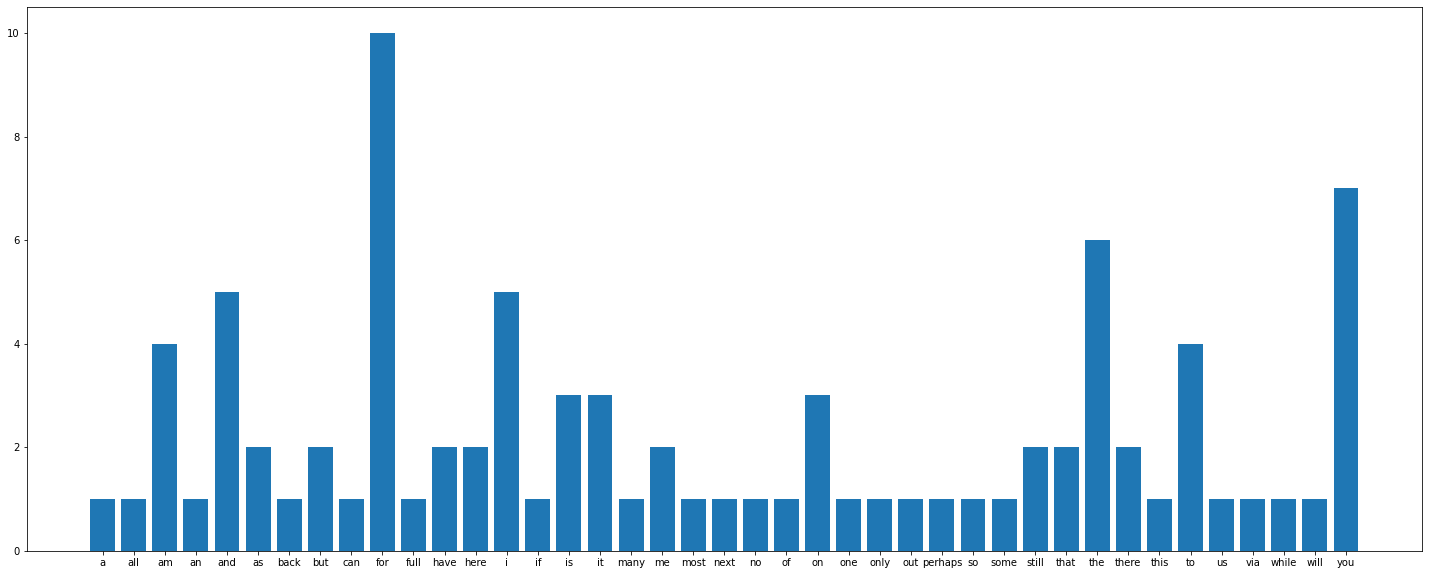

In [34]:
tweets_stopwords = [word for word in all_words if word in stop_words_spacy]
values, frequencies = np.unique(tweets_stopwords, return_counts=True)
stopwords_dict = {value: freq for value, freq in zip(values, frequencies)}

plt.figure(figsize=(25, 10))
plt.bar(values, frequencies, orientation='vertical')
plt.show()

In [35]:
! pip install wordcloud

You should consider upgrading via the '/home/stef/Documents/facultate_an3/venv/bin/python -m pip install --upgrade pip' command.


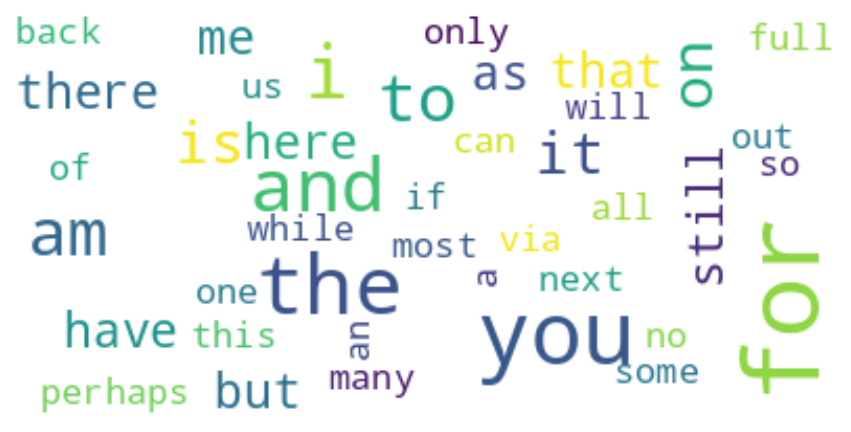

In [36]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white")
wordcloud_picture = wordcloud.generate_from_frequencies(stopwords_dict)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Lematizare/Stemming

Au rolul de a elimina inflexiunile cuvintelor: acele caractere care pot ingloba:
- persoana unui verb, in romana: voi cauta**ți** - persoana a2a plural
- timpul unui verb, in romana: voi cauta**seră**ți - mai mult ca perfectul
- etc.

![1_HLQgkMt5-g5WO5VpNuTl_g.jpeg](https://miro.medium.com/max/564/1*HLQgkMt5-g5WO5VpNuTl_g.jpeg)

## Lematizarea
Aduce cuvintele la forma lor din dictionar.

"Lemmatization is the process where we take individual tokens from a sentence and we try to reduce them to their base form. The process that makes this possible is having a vocabulary and performing morphological analysis to remove inflectional endings. The output of the lemmatization process (as shown in the figure above) is the lemma or the base form of the word. For instance, a lemmatization process reduces the inflections, "am", "are", and "is", to the base form, "be". Take a look at the figure above for a full example and try to understand what it's doing.

Lemmatization is helpful for normalizing text for text classification tasks or search engines, and a variety of other NLP tasks such as sentiment classification. It is particularly important when dealing with complex languages like Arabic and Spanish." ([sursa](https://colab.research.google.com/github/dair-ai/notebooks/blob/master/_notebooks/2020-03-19-nlp_basics_tokenization_segmentation.ipynb#scrollTo=dcaLqxPX5CJa))

## Pros:
- rezultatele sunt cuvinte existente in limba

## Cons
- procesul de cautare poate fi costisitor dpdv. computational
- limba este intr-o continua evolutie, iar de cele mai multe ori, dictionarele nu "tin pasul" cu toate cuvintele noi aparute sau imprumutate

## Stemming
Aplica algoiritmi ce folosesc automate finite (remember LFA). Multe dintre ele sunt scrise in limbajul [Snowball](http://snowball.tartarus.org/).

"Stemming is just a simpler version of lemmatization where we are interested in stripping the suffix at the end of the word. When stemming we are interesting in reducing the inflected or derived word to it's base form. Take a look at the figure above to get some intuition about the process.

Both the stemming and the lemmatization processes involve morphological analysis where the stems and affixes (called the morphemes) are extracted and used to reduce inflections to their base form. For instance, the word cats has two morphemes, cat and s, the cat being the stem and the s being the affix representing plurality." ([sursa](https://colab.research.google.com/github/dair-ai/notebooks/blob/master/_notebooks/2020-03-19-nlp_basics_tokenization_segmentation.ipynb#scrollTo=dcaLqxPX5CJa))

## Pros:
- este mai rapida ca lematizarea
- se adapteaza mai usor la cuvinte noi aparute in limba

## Cons
- rezultatele nu sunt intotdeauna, cuvinte existente in limba


In [37]:
doc = nlp("Apples and oranges are similar boots and hippos aren't")
for word in doc:
    print(word, '=>', word.lemma_)

Apples => apple
and => and
oranges => orange
are => be
similar => similar
boots => boot
and => and
hippos => hippo
are => be
n't => not


In [38]:
# spaCy doesn't support stemming so for this part we are going to use NLTK, which is another fantastic Python NLP library.
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')
doc = 'I prefer not to argue'
for token in doc.split(" "):
    print(token, '=>' , stemmer.stem(token))

I => i
prefer => prefer
not => not
to => to
argue => argu


Pentru procesarea datelor din social media putem folosi și librării dedicate, cum ar fi `Preprocessor`: https://github.com/s/preprocessor

Collocations: in functie de context, putem analiza din toate n-gramele (de cuvinte sau caractere) cel mai probabile sa apara impreuna.

Exemlu: bigrama - pereche de cuvinte cu sanse mari sa coexiste:
('Jegar', 'Sahadutha'), ('Salt', 'Sea'), ('aromatic', 'resin').

Putem aplica cateva functii din pachetul [collocations](https://www.nltk.org/howto/collocations.html) pe cuvintele gasite pe twitter, pentru a gasi top 15 bigrame folosind [Pointwise Mutual Information](https://en.wikipedia.org/wiki/Pointwise_mutual_information).

In [39]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
bigram_measures = BigramAssocMeasures()
colloc_founder = BigramCollocationFinder.from_words(all_words)

bigram_results = colloc_founder.nbest(bigram_measures.pmi, 15)
bigram_results

[('a', 'little'),
 ('aftie', 'goodmorning'),
 ('ah', 'found'),
 ('an', 'attack'),
 ('ariana', 'grande'),
 ('arrived', 'new'),
 ('attack', 'plan'),
 ('bb', 'will'),
 ('birds', 'out'),
 ('can', 'definitely'),
 ('cheers', 'massive'),
 ('dm', 'tired'),
 ('dream', 'job'),
 ('full', 'album'),
 ('fully', 'intend')]

## Unidecode 
Aduce caracterele utf8 la cea mai apropiata forma ASCII a lor. Este utila atat  pentru inlocuirea diacriticilor limbii romane, cat si pentru a gasi un echivalent pentru 'romanizarea' caracterele asiatice (desi obtine rezultate diferite de Hepburn).

In [40]:
!pip install Unidecode

You should consider upgrading via the '/home/stef/Documents/facultate_an3/venv/bin/python -m pip install --upgrade pip' command.


In [41]:
from unidecode import unidecode
unidecode('Leneşul mai mult aleargă, scumpul mai mult păgubeşte')

'Lenesul mai mult alearga, scumpul mai mult pagubeste'

In [42]:
unidecode('北京')

'Bei Jing '

# TASK:

###Deadline: 10 martie ora 23:59.
###Formular pentru trimiterea temei: https://forms.gle/kMcWxv8e39wwXy1W7.


Folosind datasetul urmator, https://github.com/ancatache/LaRoSeDa/tree/main/data - o colectie de review-uri pentru produse in romana, rezolvati urmatoarele cerinte:

1. Curatati si normalizati corpus-ul aplicand urmatoarele operatiii:

    a) afisati caracterele diferite de literele mici ale alfabetului englez

    b) transformati numerele in cuvinte folosind num2words   

    c) eliminati linkurile si alte referinte

    d) curatati-l de semnele de punctuatie

    e) impartiti textele in cuvinte (tokens), va recomandam sa folositi `spacy` incarcand unul din modelele pentru limba romana (https://spacy.io/models/ro)

    f) eliminati stopwords  

    g) aplicati stemming  

    h) aplicati lematizare peste cuvintele obtinute la punctul f. Comparand cu rezultatele de la punctul g, afisati top 15 cuvinte pentru care stemul este diferit de lema, sortate descrescator dupa numarul de caractere prin care stemul difera de lema.

    i) cautati top 20 trigrame (collocations)


2. Calculati frecventele de aparitie ale fiecarui token la punctul e) si punctul g). Plotati-le cum doriti, prin wordcloud sau plotbar. Ce diferente observati? (intrucat numarul de cuvinte distincte poate fi mare, puteti plota informatii doar despre cele mai frecvente N cuvinte)


3. Plotati distributia numarului de tokens per review (nr. de reviews vs. nr. de tokens), atat pentru review-urile negative, cat si, separat, pentru cele pozitive. Ce observati?

In [195]:
# 1a - caractere diferite de litere mici
import json
import re

with open("./positive_reviews.json") as f:
    data = f.read()
    data = json.loads(data)
    reviews = data['reviews']
    
# print(reviews[0])
non_small_letters = set()
regex = r'[^a-z]'
for r in reviews:
    li = re.findall(regex, r['title'])
    non_small_letters.update(li)
    li = re.findall(regex, r['content'])
    non_small_letters.update(li)
    li = re.findall(regex, r['index'])
    non_small_letters.update(li)
    li = re.findall(regex, r['starRating'])
    non_small_letters.update(li)

print(non_small_letters)

{'K', '̶', '*', '£', '¡', '6', ']', '»', 'C', '^', '•', '[', '"', '—', '@', 'F', 'Z', 'ä', 'é', 'N', '-', 'H', 'L', 'O', 'G', '1', '°', ')', '!', 'Î', '2', 'M', 'A', 'ω', '⭐', '⛤', "'", '+', 'X', '®', '9', '️', '“', '✌', 'R', 'S', 'P', '0', ':', 'B', '„', 'í', 'U', '{', '★', '.', 'D', 'ƒ', 'V', '8', '4', '?', '€', '3', '–', '×', '&', '>', '”', 'I', 'J', 'Y', '→', 'E', 'Ș', '☆', '~', '(', 'T', 'ű', '…', '✓', '=', ';', '/', '`', 'Ț', '’', ',', '5', '7', '<', '☺', '#', '«', '❤', '%', '_', '$', '|', 'W', ' ', '\\', 'å', 'ī'}


In [196]:
# 1b cifre -> cuvinte

from num2words import num2words

no_cifre = reviews
for r in no_cifre:
    for k in ['index', 'title', 'content', 'starRating']:
        r[k] = ' '.join([num2words(w, lang='ro') if w.isdigit() else w for w in r[k].split()])
        
print(no_cifre[:5])

[{'index': 'unu', 'title': 'Super - exceptional raport calitate-pret', 'content': 'am analizat la sange toate bratarile de fitness si smartwatch-urile de pe piata de pana la 1.000 lei (bugetul maxim alocat de mine pentru aceasta investitie) si pot sa spun ca acesta avea cele mai pozite review-uri mai peste tot.... alternativa era un apple watch, al carui baterie nu tinea mult din ce am inteles (in jur de unu zi jumatate). despre ceas: pro: - l-am pus la incarcat in a 4-a zi, cu mentiunea ca inca mai avea 20% baterie (m-ar mai fi tinut o zi); - pulsul este foarte precis - am testat comparativ cu un tensiometru si au aparut diferente de 1-2 batai pe minut (ceea ce este foarte bine); - pasii sunt cat de cat corecti, cu o eroare de pana la 5% maximum, insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu, aceasta fiind doar o estimare; - alergatul il inregistreaza cum trebuie, la fel si exercitiile (le-am introdus la categoria "workout", insa sunt sigura ca si la celelalte functio

In [197]:
# 1c scot linkuri

regex = r'(www|http)\S+'
no_link = no_cifre
for i, r in enumerate(no_link):
    for k in ['title', 'content']:
        r[k] = re.sub(regex, '', r[k])
        
print(no_link[:5])

[{'index': 'unu', 'title': 'Super - exceptional raport calitate-pret', 'content': 'am analizat la sange toate bratarile de fitness si smartwatch-urile de pe piata de pana la 1.000 lei (bugetul maxim alocat de mine pentru aceasta investitie) si pot sa spun ca acesta avea cele mai pozite review-uri mai peste tot.... alternativa era un apple watch, al carui baterie nu tinea mult din ce am inteles (in jur de unu zi jumatate). despre ceas: pro: - l-am pus la incarcat in a 4-a zi, cu mentiunea ca inca mai avea 20% baterie (m-ar mai fi tinut o zi); - pulsul este foarte precis - am testat comparativ cu un tensiometru si au aparut diferente de 1-2 batai pe minut (ceea ce este foarte bine); - pasii sunt cat de cat corecti, cu o eroare de pana la 5% maximum, insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu, aceasta fiind doar o estimare; - alergatul il inregistreaza cum trebuie, la fel si exercitiile (le-am introdus la categoria "workout", insa sunt sigura ca si la celelalte functio

In [198]:
# 1d semne de punctuatie

import string

regex = fr'([{string.punctuation}])'
no_punctuation = no_cifre
for i, r in enumerate(no_punctuation):
    for k in ['title', 'content']:
        r[k] = re.sub(regex, ' ', r[k])
        # mai trec o data prin num2words
        r[k] = ' '.join([num2words(w, lang='ro') if w.isdigit() else w for w in r[k].split()])
        # prea multe spatii
        r[k] = re.sub(r'\s+', ' ', r[k])
        
print(reviews[:5])

[{'index': 'unu', 'title': 'Super exceptional raport calitate pret', 'content': 'am analizat la sange toate bratarile de fitness si smartwatch urile de pe piata de pana la unu zero lei bugetul maxim alocat de mine pentru aceasta investitie si pot sa spun ca acesta avea cele mai pozite review uri mai peste tot alternativa era un apple watch al carui baterie nu tinea mult din ce am inteles in jur de unu zi jumatate despre ceas pro l am pus la incarcat in a patru a zi cu mentiunea ca inca mai avea douăzeci baterie m ar mai fi tinut o zi pulsul este foarte precis am testat comparativ cu un tensiometru si au aparut diferente de unu doi batai pe minut ceea ce este foarte bine pasii sunt cat de cat corecti cu o eroare de pana la cinci maximum insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu aceasta fiind doar o estimare alergatul il inregistreaza cum trebuie la fel si exercitiile le am introdus la categoria workout insa sunt sigura ca si la celelalte functioneaza ok somnul il mo

In [199]:
# 1e - tokenize

from spacy.tokenizer import Tokenizer
from copy import deepcopy

nlp = Romanian()
tokenizer = nlp.tokenizer

tokenized_reviews = deepcopy(reviews)
for i, r in enumerate(tokenized_reviews):
    for k in ['title', 'content']:
        r[k] = [x for x in list(tokenizer(r[k]))]
        
print(tokenized_reviews[:5])

[{'index': 'unu', 'title': [Super, exceptional, raport, calitate, pret], 'content': [am, analizat, la, sange, toate, bratarile, de, fitness, si, smartwatch, urile, de, pe, piata, de, pana, la, unu, zero, lei, bugetul, maxim, alocat, de, mine, pentru, aceasta, investitie, si, pot, sa, spun, ca, acesta, avea, cele, mai, pozite, review, uri, mai, peste, tot, alternativa, era, un, apple, watch, al, carui, baterie, nu, tinea, mult, din, ce, am, inteles, in, jur, de, unu, zi, jumatate, despre, ceas, pro, l, am, pus, la, incarcat, in, a, patru, a, zi, cu, mentiunea, ca, inca, mai, avea, douăzeci, baterie, m, ar, mai, fi, tinut, o, zi, pulsul, este, foarte, precis, am, testat, comparativ, cu, un, tensiometru, si, au, aparut, diferente, de, unu, doi, batai, pe, minut, ceea, ce, este, foarte, bine, pasii, sunt, cat, de, cat, corecti, cu, o, eroare, de, pana, la, cinci, maximum, insa, nu, am, stat, sa, verific, fix, pe, fix, sa, vad, daca, e, asa, sau, nu, aceasta, fiind, doar, o, estimare, alerg

In [82]:
!python -m spacy download ro_core_news_sm

     |████████████████████████████████| 16.6 MB 1.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/stef/Documents/facultate_an3/venv/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('ro_core_news_sm')


In [208]:
# 1f stop words

nlp = spacy.load('ro_core_news_sm')
stop_words_spacy = nlp.Defaults.stop_words
print(len(stop_words_spacy))
print(list(stop_words_spacy)[:25])

for r in tokenized_reviews:
    for k in ['title', 'content']:
        r[k] = [w for w in r[k] if str(w) not in stop_words_spacy]
        
print(tokenized_reviews[:5])

494
['căruia', 'apăi', 'atatea', 'deasupra', 'zi', 'deja', 'da', 'voştri', 'mai', 'aceia', 'ea', 'acela', 'sau', 'acei', 'daca', 'încît', 'iti', 'ala', 'sa', 'rog', 'sai', 'noastră', 'printr-', 'insa', 'acelasi']
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
<class 'spacy.tok

IndexError: list index out of range

In [227]:
# 1g - stemming
from copy import copy

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='romanian')

stemmed_reviews = [{
        "index": r['index'],
        "content": [str(w) for w in r["content"]],
        "title": [str(w) for w in r["title"]],
        "starRating": r['starRating'],
    } for r in tokenized_reviews]

for r in stemmed_reviews:
    for k in ['title', 'content']:
        r[k] = [stemmer.stem(str(w)) for w in r[k]]

print(stemmed_reviews[:5])

[{'index': 'unu', 'content': ['analiz', 'sang', 'bratar', 'fitness', 'smartwatch', 'urî', 'piat', 'pan', 'leu', 'buget', 'max', 'aloc', 'investit', 'spun', 'pozit', 'review', 'urî', 'altern', 'apple', 'watch', 'caru', 'bater', 'tin', 'inteles', 'jur', 'jumat', 'ceas', 'pro', 'pun', 'incarc', 'mentiun', 'douăzec', 'bater', 'tinut', 'puls', 'precis', 'test', 'compar', 'tensiometru', 'apar', 'diferent', 'bata', 'minut', 'pas', 'corect', 'eroar', 'pan', 'maximum', 'sta', 'verif', 'fix', 'fix', 'vad', 'fi', 'estim', 'alerg', 'inregistreaz', 'treb', 'exerc', 'introduc', 'categor', 'workout', 'sigur', 'celălalt', 'functioneaz', 'ok', 'somn', 'monitorizeaz', 'dest', 'ridic', 'bea', 'apă', 'pan', 'toalet', 'apăr', 'awak', 'urmand', 'inregistr', 'somn', 'continu', 'pun', 'pat', 'dorm', 'rezistent', 'apă', 'prelu', 'resping', 'apel', 'telefon', 'funct', 'util', 'raspuns', 'treb', 'lua', 'telefon', 'vorbest', 'efect', 'pot', 'raspund', 'mesaj', 'ceas', 'funct', 'android', 'deranjeaz', 'tar', 'intr

In [259]:
# h - lemma
lemma_reviews = tokenized_reviews
for r in lemma_reviews:
    for k in ['title', 'content']:
        txt = ' '.join([str(w) for w in r[k]])
        doc = nlp(txt)
        r[k] = [w.lemma_ for w in doc]
        
print(lemma_reviews[:5])

[{'index': 'unu', 'title': ['Super', 'exceptional', 'raport', 'calitate', 'pret'], 'content': ['analiza', 'sange', 'bratarile', 'fitness', 'smartwatch', 'urî', 'piata', 'pană', 'leu', 'buget', 'maxim', 'aloca', 'investitie', 'spune', 'pozite', 'review', 'urî', 'alternativ', 'apple', 'watch', 'carui', 'baterie', 'tinea', 'inteles', 'jura', 'jumatate', 'ceas', 'pro', 'pune', 'incarcat', 'mentiunea', 'douăzeci', 'baterie', 'tinut', 'puls', 'precis', 'testa', 'comparativ', 'tensiometru', 'aparut', 'diferente', 'batai', 'minut', 'pasii', 'corecti', 'eroare', 'pană', 'maximum', 'sta', 'verifica', 'fix', 'fix', 'vad', 'fi', 'estimare', 'alerga', 'inregistreaza', 'trebui', 'exercitiile', 'introduce', 'categorie', 'workout', 'sigur', 'celălalt', 'functioneaza', 'ok', 'somn', 'monitorizeaza', 'destul', 'ridica', 'bea', 'apă', 'pană', 'toaletă', 'apărea', 'awake', 'urmand', 'inregistreze', 'somn', 'continuare', 'pune', 'pat', 'dormi', 'rezistent', 'apă', 'prelua', 'respinge', 'apel', 'telefon', '

In [229]:
pip install python-Levenshtein

     |████████████████████████████████| 50 kB 1.3 MB/s eta 0:00:011
Using legacy 'setup.py install' for python-Levenshtein, since package 'wheel' is not installed.
    Running setup.py install for python-Levenshtein ... done
You should consider upgrading via the '/home/stef/Documents/facultate_an3/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [265]:
from Levenshtein import distance as lev

words = set()

leeen = len(lemma_reviews)

for s, l in zip(stemmed_reviews[:leeen], lemma_reviews[:leeen]):
    for k in ['title', 'content']:
        for ss, ll in zip(s[k], l[k]):
            words.add((ss, ll.lower(), lev(ss, ll.lower())))

words = list(words)
words.sort(key=lambda x: -x[2])
print(words[:15])

[('extens', 'extensibilitatea', 10), ('compat', 'compatibilitatea', 10), ('umidif', 'umidificatorului', 10), ('dispon', 'disponibilitate', 9), ('compat', 'compatibilitate', 9), ('incarc', 'incarcatoarelor', 9), ('respir', 'respirabilitate', 9), ('ajust', 'ajustabilitate', 9), ('function', 'functionabilitate', 9), ('practic', 'practicabilitate', 9), ('impos', 'imposibilitate', 9), ('acces', 'accesibilitate', 9), ('aliment', 'alimentatorului', 8), ('cumpar', 'cumparatorilor', 8), ('incarc', 'incarcatorului', 8)]


In [272]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder

all_words = [x[1] for x in words]

trigram_measures = TrigramAssocMeasures()
colloc_founder = TrigramCollocationFinder.from_words(all_words)

trigram_results = colloc_founder.nbest(trigram_measures.pmi, 15)
trigram_results

[('000ma', 'protejand', 'yahoomail'),
 ('000mah', 'rock', 'valexandru'),
 ('06v', 'inexistent', 'pahar'),
 ('09a', 'vb', 'teatat'),
 ('10', 'rest', 'oficial'),
 ('10000ma', 'location', 'intact'),
 ('10000mah', '500mah', 'intorc'),
 ('1000lei', 'arata', 'amiază'),
 ('1000mah', 'highlight', 'operatoriu'),
 ('10050mah', 'practic', 'beton'),
 ('100d', '̶i̶n̶', 'lent'),
 ('100lei', 'tableata', 'cutiuta'),
 ('100mb', 'interes', 'skills'),
 ('100ron', 'echilibru', 'iso'),
 ('100w', 'ff', 'hack')]

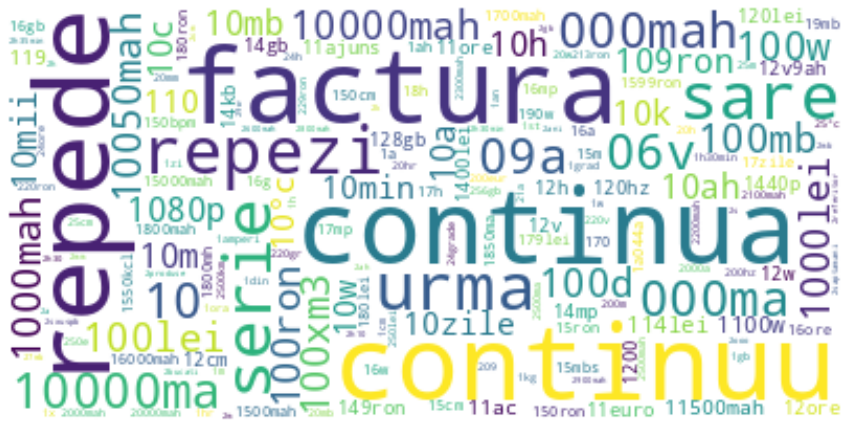

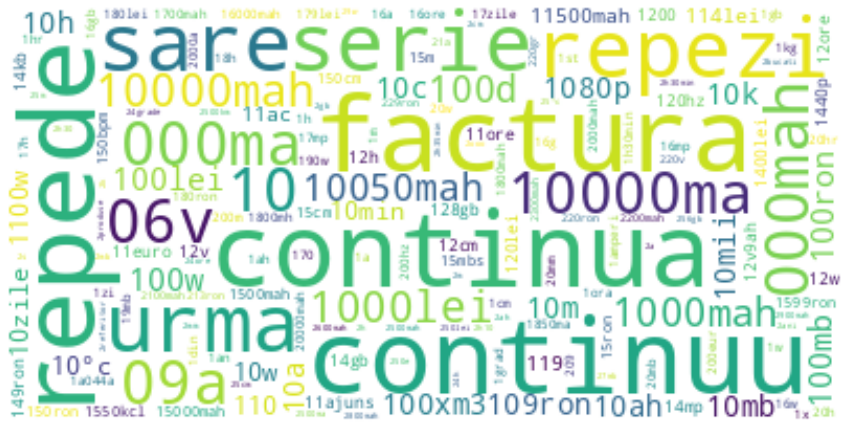

In [282]:
# 2

tokenized_reviews = deepcopy(reviews)
all_words_e = []
for i, r in enumerate(tokenized_reviews):
    for k in ['title', 'content']:
        r[k] = [str(x) for x in list(tokenizer(r[k]))]
        all_words_e.extend(r[k])

values_e, frequencies_e = np.unique(all_words_e, return_counts=True)
d = {value: freq for value, freq in zip(values, frequencies)}

from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=50, max_words=3000, background_color="white")
wordcloud_picture = wordcloud.generate_from_frequencies(d)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

all_words_g = []
for i, r in enumerate(stemmed_reviews):
    for k in ['title', 'content']:
        all_words_g.extend(r[k])

values_e, frequencies_e = np.unique(all_words_g, return_counts=True)
d = {value: freq for value, freq in zip(values, frequencies)}

wordcloud_picture = wordcloud.generate_from_frequencies(d)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# apar diferente intrucat in urma stemming-ului dispare unele multimi de cuvinte se reunesc